In [1]:
COLAB=False #if running on https://colab.research.google.com/notebooks/welcome.ipynb

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

In [3]:
if COLAB == True :
    from google.colab import drive
    drive.mount('/content/drive')
    

## Directories

In [4]:
model_dir = '../sample_code_submission/'
result_dir = '../sample_result_submission/' 
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
visualizer_dir = '../visualize/'

### Add directories to path

In [5]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../")
path.append(visualizer_dir)


**Imports**

In [6]:
# from data_loader import get_settings_from_json
from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [7]:
# Init Ingestion
ingestion = Ingestion()

# Start timer
ingestion.start_timer()


In [8]:
# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [9]:
Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [10]:
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
0,35.0409,2.042970,-2.387200,1,0,39.8092,0.937167,1.273770,52.6360,3.428380,...,163.088048,3.212965,2.84584,31.799220,189.7871,0.880221,11.611226,2.845841,1.356804,0.987482
1,46.4443,0.418584,-0.009089,0,1,31.5092,-0.787193,-2.443580,40.7707,3.628940,...,322.847747,-2.856676,2.71674,69.979712,180.3445,1.473992,30.060310,2.716734,1.413064,0.813796
2,46.9579,-0.345630,-1.832820,0,1,23.4287,-1.485270,1.138980,35.5342,0.452842,...,65.328137,-0.672593,3.18282,34.043386,129.3495,2.004290,26.598509,3.182825,-1.414057,0.969488
3,20.1281,1.068350,-2.141910,0,1,52.4248,0.851526,1.438840,52.4248,0.851526,...,124.758478,-1.091648,2.71112,109.066901,193.3039,0.383942,2.305880,2.711120,0.559870,0.235082
4,51.9051,0.182091,1.389470,1,0,46.7823,0.711944,0.014443,136.2830,1.863080,...,171.718705,1.326409,1.47358,39.111522,326.2364,1.109503,3.187670,1.473582,0.947384,0.025007


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
count,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,...,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000
mean,33.437330,0.001235,-0.001865,0.449028,0.550972,44.379044,0.002267,-0.002795,67.872492,0.004587,...,144.186711,-2.660744,2.589522,53.299488,174.121111,0.870222,20.595831,2.589522,0.491910,-2.599371
std,17.680386,1.190893,1.812230,0.497397,0.497397,23.575922,1.217991,1.812203,59.142442,1.558191,...,275.325408,4.267632,0.711154,37.044916,142.253215,0.543799,20.127484,0.711154,1.118595,3.642483
min,20.000100,-2.499920,-3.141570,0.000000,0.000000,22.942400,-2.673120,-3.141570,22.942400,-4.890660,...,-7.000000,-21.895106,0.575897,0.250426,43.072100,0.037949,-0.000000,0.575889,-1.414214,-7.000000
25%,23.820700,-0.902570,-1.573992,0.000000,0.000000,30.999300,-0.938125,-1.576418,35.501400,-1.128285,...,-7.000000,-7.000000,2.156402,33.104430,69.620500,0.547381,5.832205,2.156400,-0.688766,-7.000000
50%,28.635500,-0.004094,0.001019,0.000000,1.000000,38.726350,0.006881,0.002611,46.545800,0.010439,...,70.734257,-1.893391,2.843955,45.910001,139.257850,0.752729,14.359052,2.843950,1.124903,0.000002
75%,36.369350,0.904405,1.563150,1.000000,1.000000,49.368375,0.939828,1.561290,73.229775,1.133825,...,178.842981,0.474225,3.106568,62.590604,222.182825,1.034420,29.878233,3.106569,1.380503,0.460625
max,576.872000,2.499870,3.141570,1.000000,1.000000,599.825000,2.670180,3.141510,1083.160000,4.919970,...,6865.710623,19.573016,5.326800,769.308658,2187.207000,13.694428,411.951091,5.326794,1.414214,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

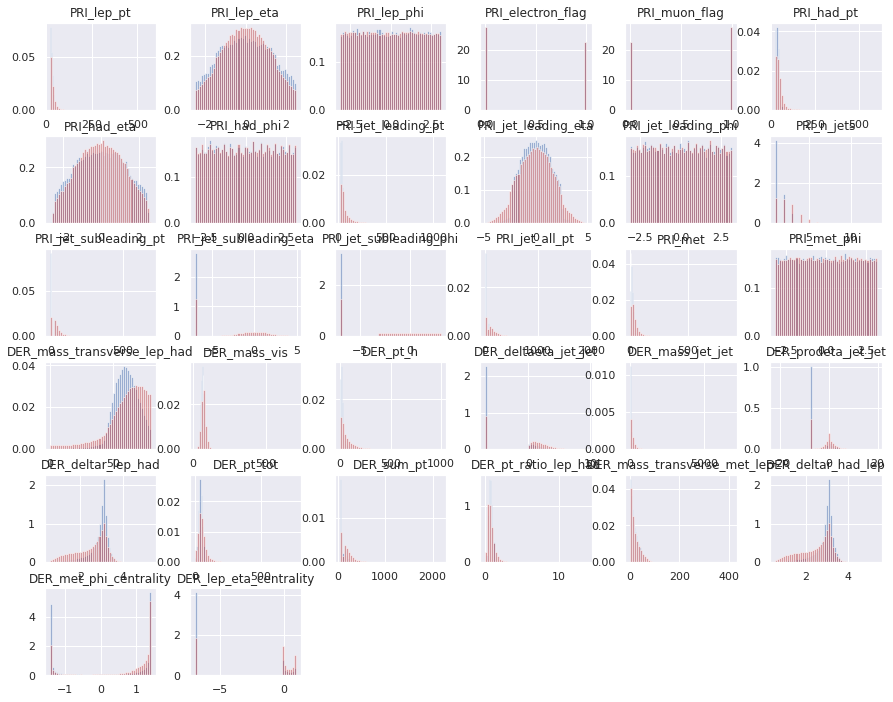

In [11]:
Train_data_vis.histogram_dataset()

Signal feature  correlation matrix


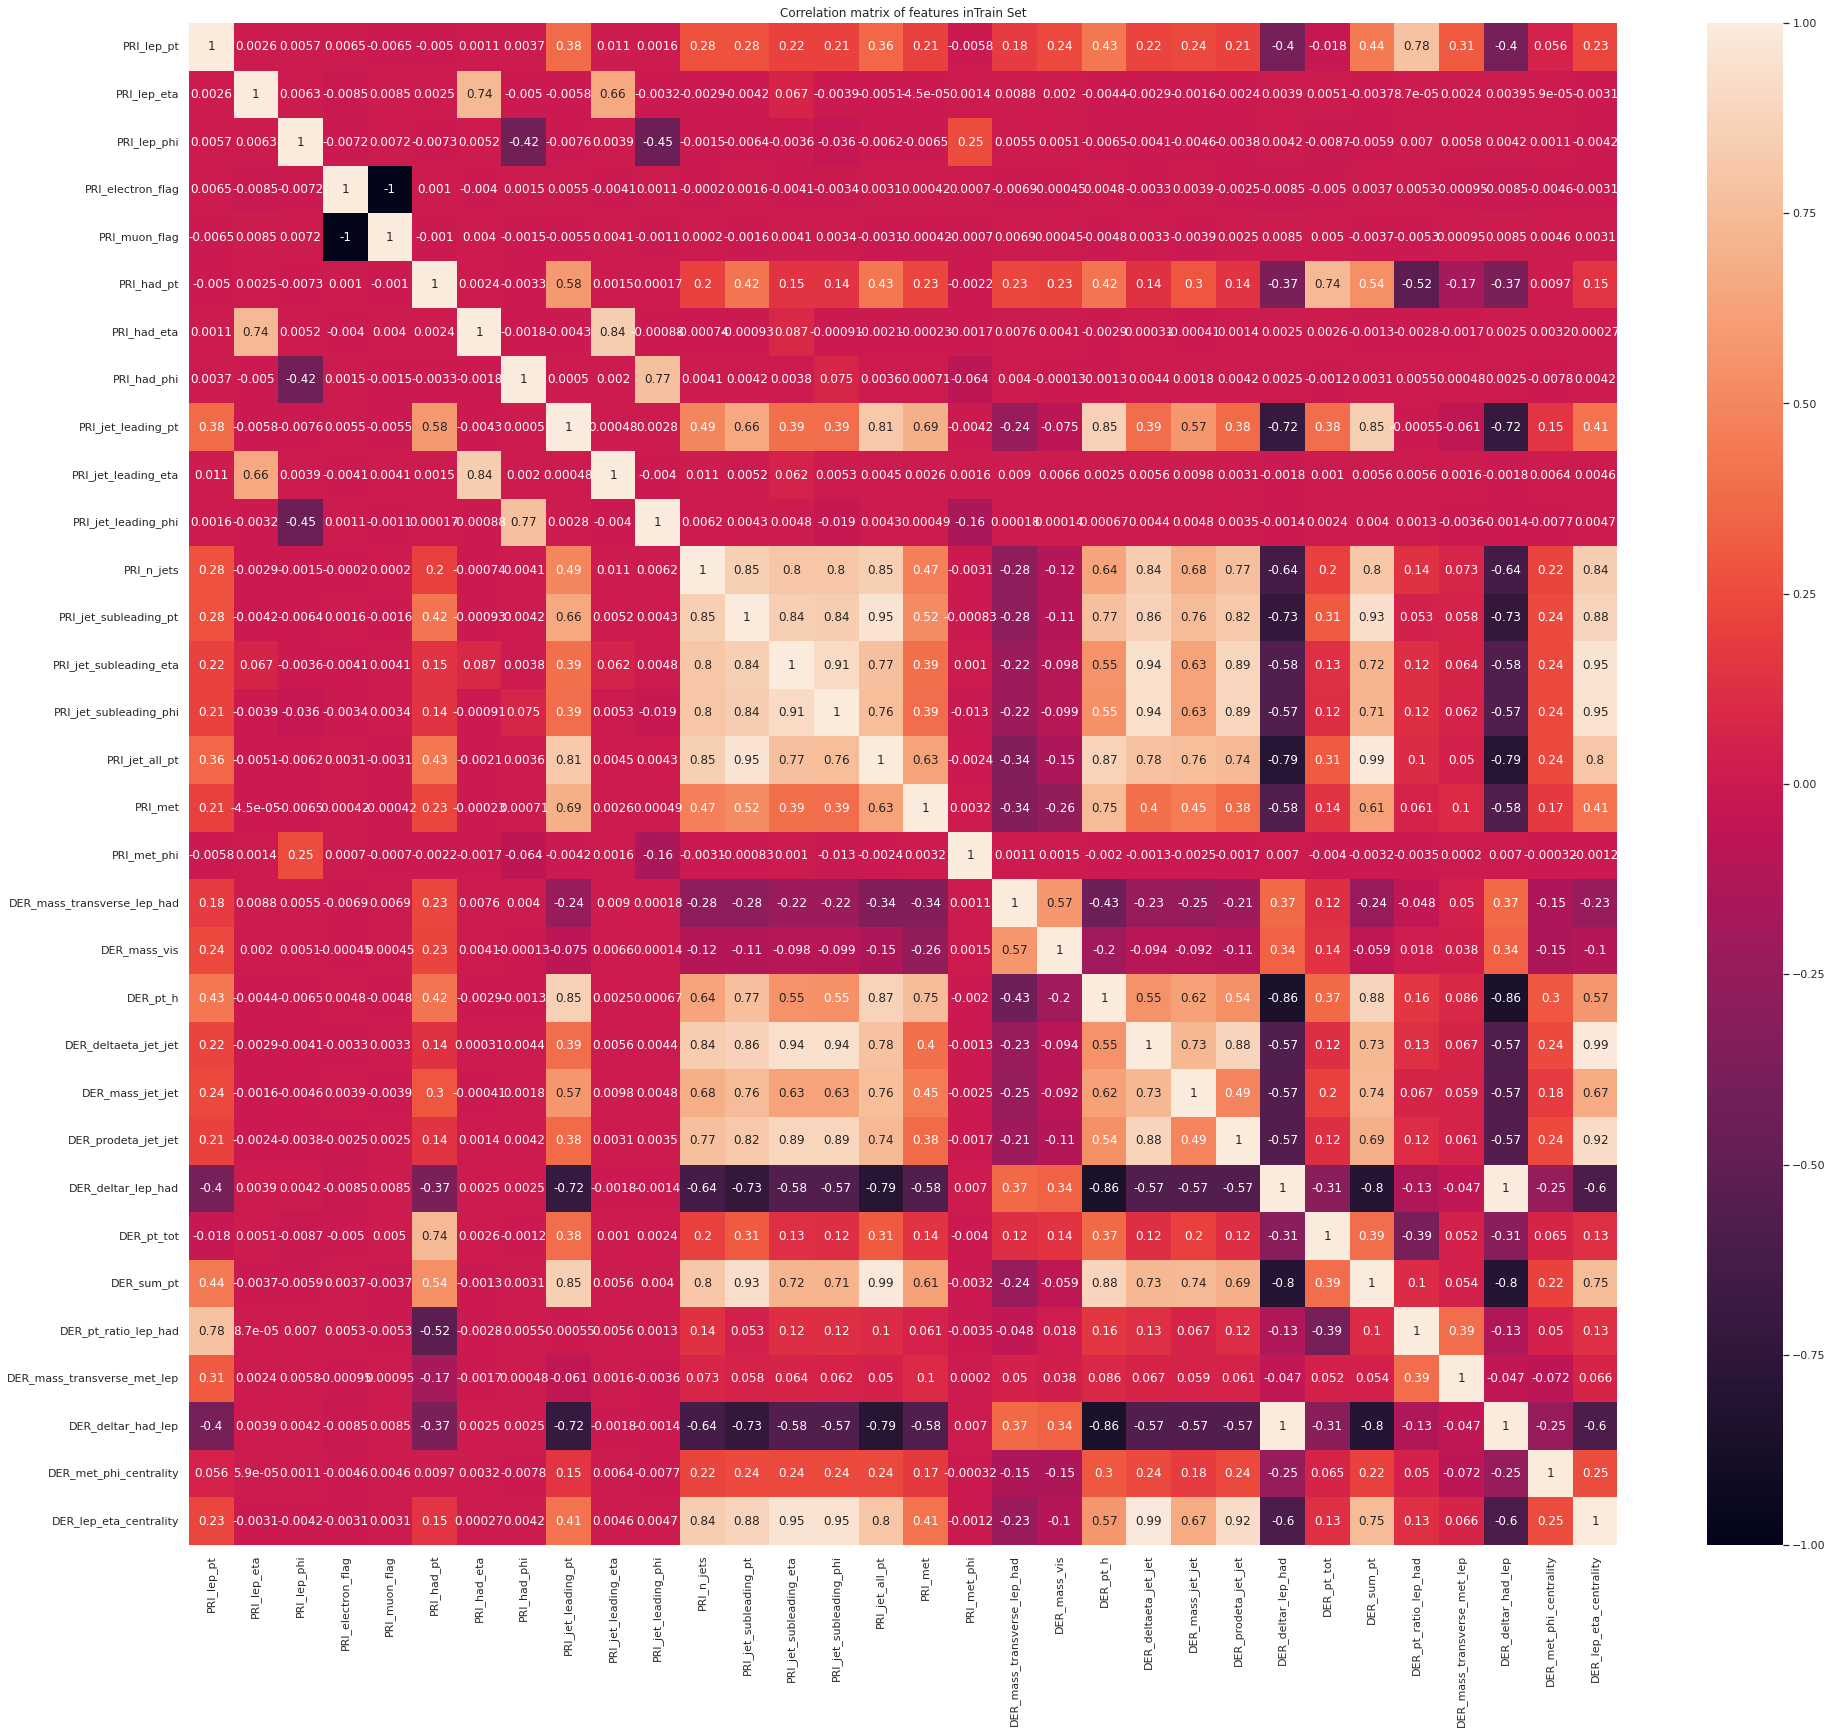

Background feature  correlation matrix


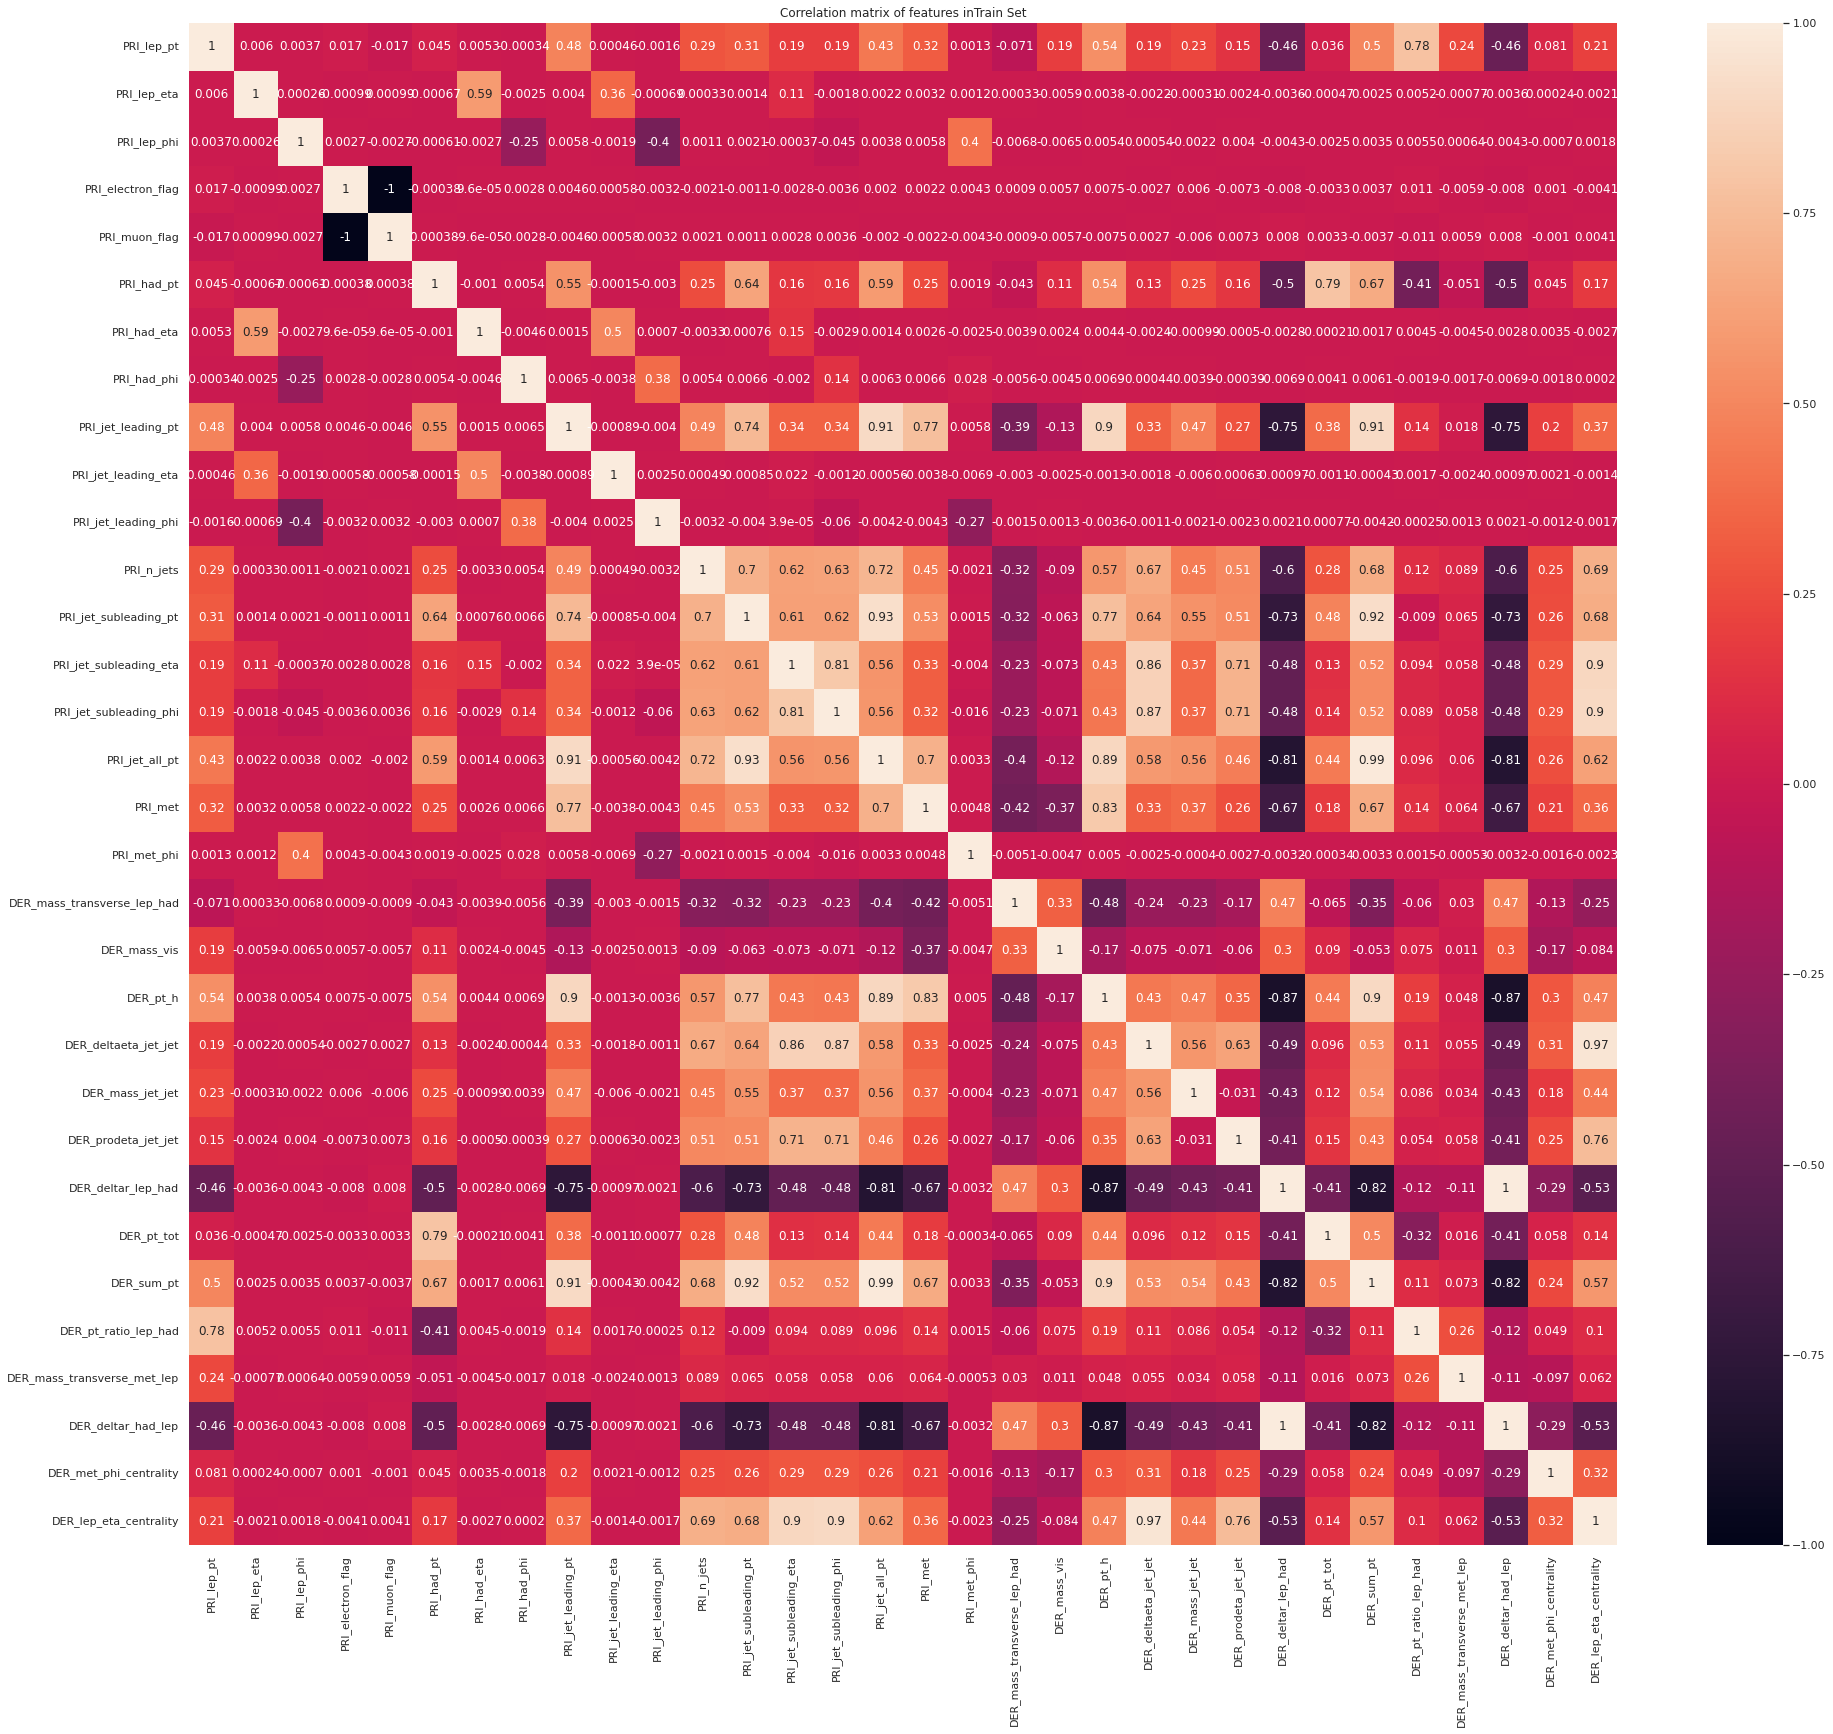

In [12]:
Train_data_vis.correlation_plots()

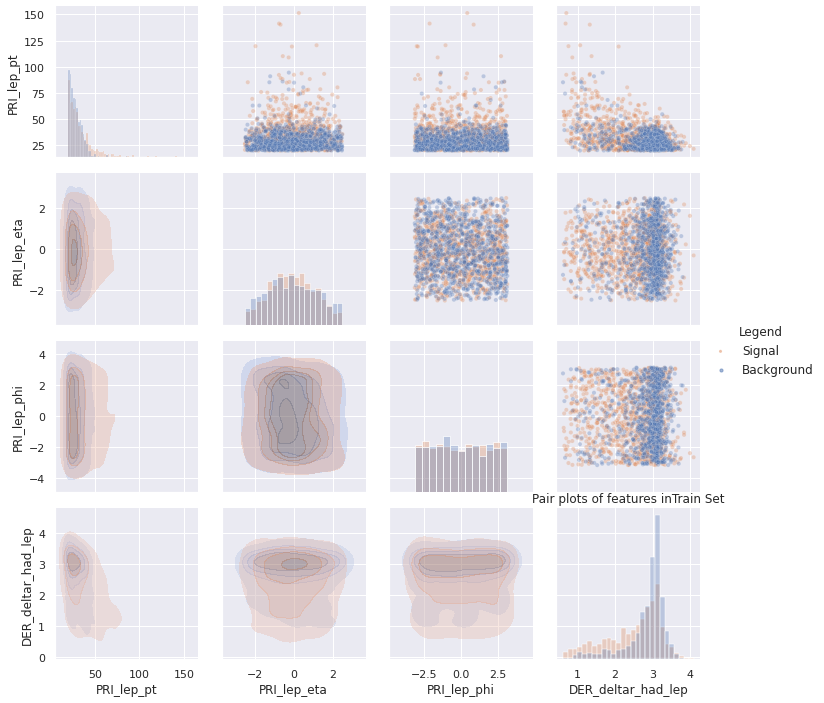

In [13]:
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [14]:
# Train_data_vis.cluster_plot(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])

In [15]:
# n = 1
# for i in range(n):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [16]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()


model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 1.0
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.810200001
sum of background 2860861.8102000006
[0]	validation_0-logloss:0.60281	validation_0-auc:0.83796	validation_1-logloss:0.65642	validation_1-auc:0.38296
[1]	validation_0-logloss:0.55547	validation_0-auc:0.84420	validation_1-logloss:0.62642	validation_1-auc:0.38975
[2]	validation_0-logloss:0.52573	validation_0-auc:0.84969	validation_1-logloss:0.63689	validation_1-auc:0.38972
[3]	validation_0-logloss:0.50658	validation_0-auc:0.85276	validation_1-logloss:0.65209	validation_1-auc:0.40074
[4]	validation_0-logloss:0.49470	validation_0-auc:0.85467	validation_1-logloss:0.66225	validation_1-auc:0.42345
[5]	validation_0-logloss:0.48599	validation_0-auc:0.85645	validation_1-logloss:0.68443	validation_1-auc:0.41954
[6]	validati

[70]	validation_0-logloss:0.41136	validation_0-auc:0.89385	validation_1-logloss:2.64070	validation_1-auc:0.45626
[71]	validation_0-logloss:0.41068	validation_0-auc:0.89422	validation_1-logloss:2.66485	validation_1-auc:0.45693
[72]	validation_0-logloss:0.41041	validation_0-auc:0.89434	validation_1-logloss:2.63759	validation_1-auc:0.45845
[73]	validation_0-logloss:0.40969	validation_0-auc:0.89473	validation_1-logloss:2.60581	validation_1-auc:0.46092
[74]	validation_0-logloss:0.40890	validation_0-auc:0.89519	validation_1-logloss:2.60759	validation_1-auc:0.46054
[75]	validation_0-logloss:0.40806	validation_0-auc:0.89570	validation_1-logloss:2.61041	validation_1-auc:0.46033
[76]	validation_0-logloss:0.40748	validation_0-auc:0.89603	validation_1-logloss:2.59722	validation_1-auc:0.46074
[77]	validation_0-logloss:0.40698	validation_0-auc:0.89627	validation_1-logloss:2.56725	validation_1-auc:0.46019
[78]	validation_0-logloss:0.40657	validation_0-auc:0.89646	validation_1-logloss:2.53432	validati


[*] --- theta: 0.31--- nu_roi: 101656.11869040717 --- beta_roi: 100833.95073436643 --- gamma_roi: 822.1679560407443 --- sigma squared: 0.15038773957336615

[*] --- theta: 0.32--- nu_roi: 97731.77636905036 --- beta_roi: 96915.94448811004 --- gamma_roi: 815.831880940333 --- sigma squared: 0.14683664310821992

[*] --- theta: 0.33--- nu_roi: 93481.28590328398 --- beta_roi: 92670.89529744085 --- gamma_roi: 810.3906058431267 --- sigma squared: 0.14234292367277948

[*] --- theta: 0.34--- nu_roi: 89758.93404432332 --- beta_roi: 88954.94376544363 --- gamma_roi: 803.9902788796824 --- sigma squared: 0.13885965790524896

[*] --- theta: 0.35000000000000003--- nu_roi: 86552.27459143996 --- beta_roi: 85753.5379429698 --- gamma_roi: 798.73664847016 --- sigma squared: 0.13566607558007623

[*] --- theta: 0.36--- nu_roi: 83377.87000555759 --- beta_roi: 82584.50848308546 --- gamma_roi: 793.3615224721229 --- sigma squared: 0.13246725259786105

[*] --- theta: 0.37--- nu_roi: 80103.93239669676 --- beta_roi:


[*] --- theta: 0.87--- nu_roi: 9728.706106888567 --- beta_roi: 9259.348681604159 --- gamma_roi: 469.357425284409 --- sigma squared: 0.04416189475003903

[*] --- theta: 0.88--- nu_roi: 8834.675528738095 --- beta_roi: 8376.977528674919 --- gamma_roi: 457.6980000631744 --- sigma squared: 0.04217281339832379

[*] --- theta: 0.89--- nu_roi: 7847.732191081688 --- beta_roi: 7401.6450854768755 --- gamma_roi: 446.0871056048127 --- sigma squared: 0.03943708752017789

[*] --- theta: 0.9--- nu_roi: 7290.743257600344 --- beta_roi: 6859.706749292198 --- gamma_roi: 431.0365083081473 --- sigma squared: 0.0392413276972688

[*] --- theta: 0.91--- nu_roi: 6533.029917835544 --- beta_roi: 6117.594755361973 --- gamma_roi: 415.4351624735724 --- sigma squared: 0.037853683104373

[*] --- theta: 0.92--- nu_roi: 5833.275803333847 --- beta_roi: 5434.9107529633775 --- gamma_roi: 398.36505037046953 --- sigma squared: 0.036757845803114725

[*] --- theta: 0.93--- nu_roi: 5270.702181101614 --- beta_roi: 4890.52374471

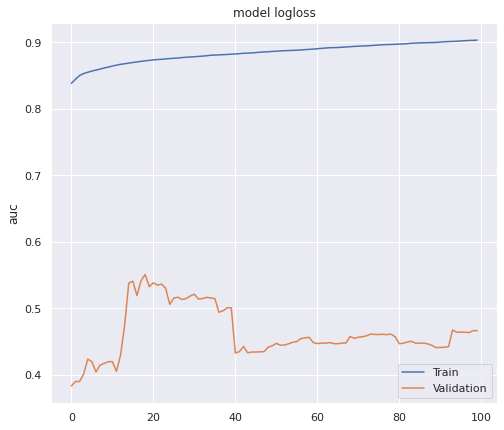

In [17]:
results = model.model.evals_result()

validationcurve(results,'auc')

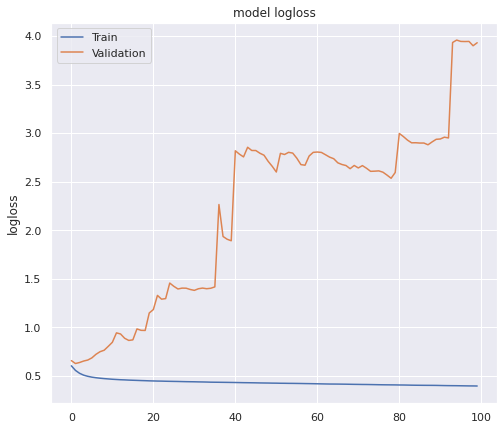

In [18]:
validationcurve(results,'logloss')

In [19]:
# lgb.plot_metric(results)

In [20]:
# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Calling predict method of submitted model
[*] - Testing
[*] - Computing Test result

[*] --- AUC test : 0.8588552422126068
[*] --- total weight test: 2870527.8620537138
[*] --- total weight train: 2870527.8620537147
[*] --- total test signal : 9666.051853714001
[*] --- total test background train: 2860861.8102
[*] --- Significance : 17.581120724695523
[*] --- delta_mu_stat : 0.05687919534022302
[*] --- mean N: 24606.8734 --- sigma N: 158.75212430843246
[*] --- signal: 3454.5219339584537 --- background: 573.8888690113072 --- N_roi 4028.410802969761
[*] --- signal test: 2757.888664167475 --- background test: 21849.20641078309 --- N_roi 24606.8734

[*] --- mu hat test :0.9999196215012437 + 1.0574825414156908 - 0.9423567015867966




## Visualise Model

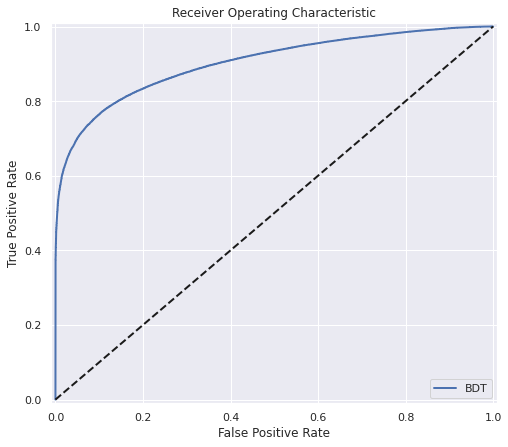

<Figure size 576x504 with 0 Axes>

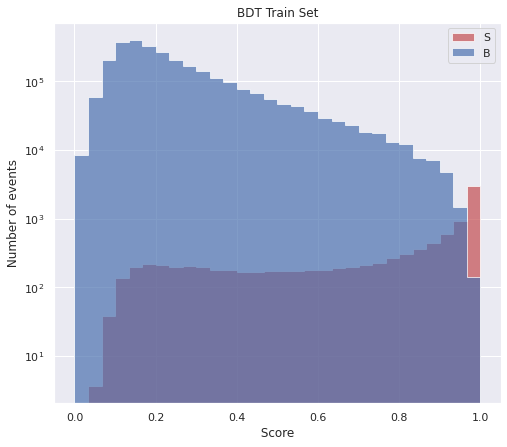

<Figure size 576x504 with 0 Axes>

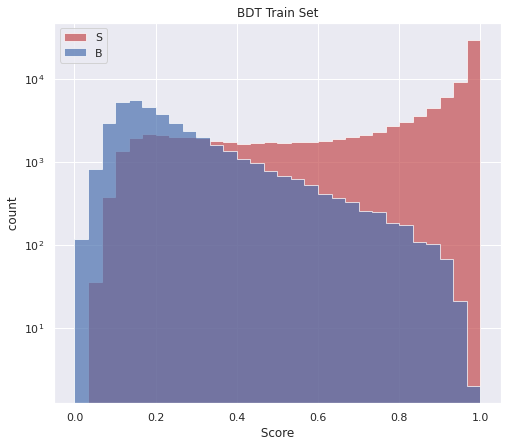

In [21]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


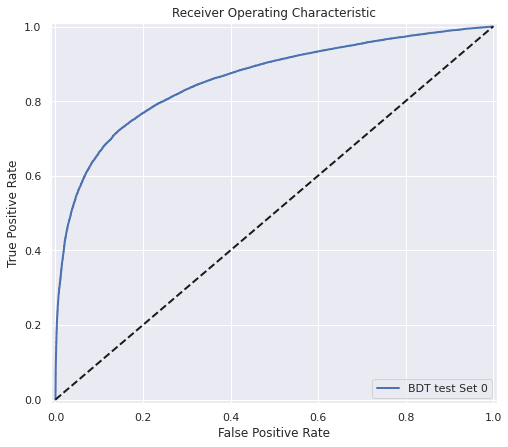

<Figure size 576x504 with 0 Axes>

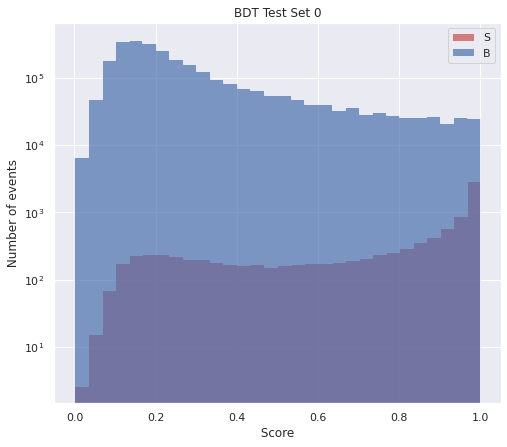

<Figure size 576x504 with 0 Axes>

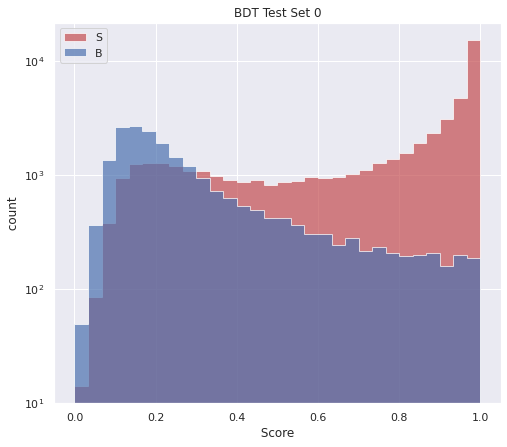

In [22]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

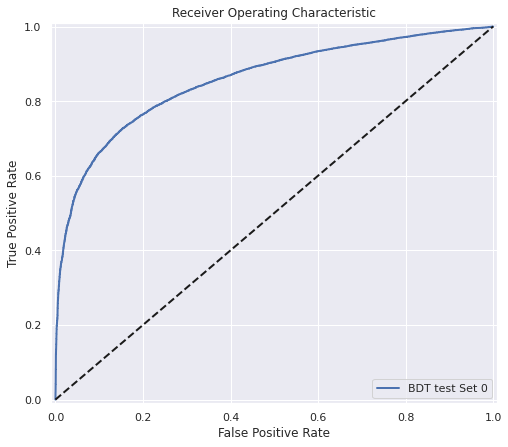

<Figure size 576x504 with 0 Axes>

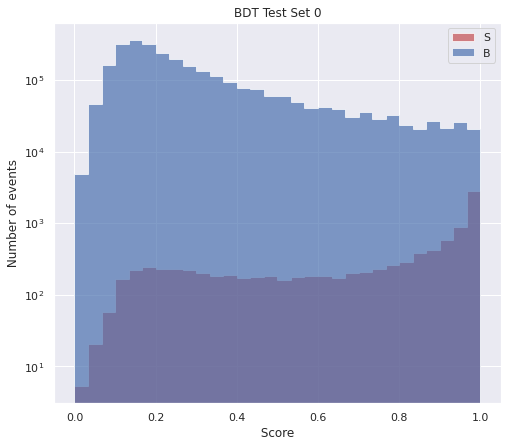

<Figure size 576x504 with 0 Axes>

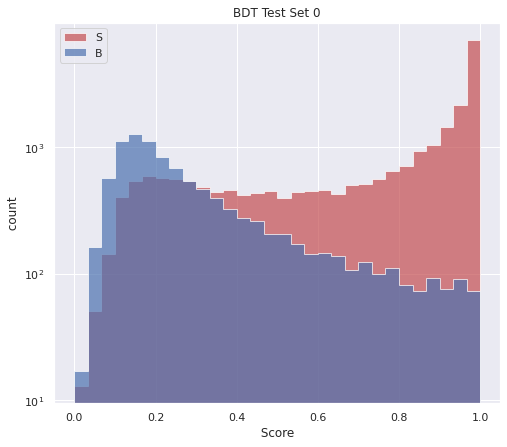

In [23]:
i = 0
for valid_set in model.validation_sets:
    roc_curve_(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(valid_set['score'],valid_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [24]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result
[*] --- delta_mu_hat: 5.0018754917067625
[*] --- mu_hats (avg): 0.9999196215012437

---------------------------------
[✔] Total duration: 0:02:30.770537
---------------------------------


## End